# Delhi House Prices Prediction

In [1]:
# Import some important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
%matplotlib inline

In [2]:
# Supress warning for clean notebook
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df = pd.read_csv('C:/Users/ashit/Downloads/ML/Delhi_v2.csv')
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [4]:
df.shape

(7738, 18)

In [5]:
df.groupby('type_of_building')['type_of_building'].agg('count')

type_of_building
Flat                6226
Individual House    1512
Name: type_of_building, dtype: int64

### Drop unnessesory columns

In [6]:
df1 = df.drop(['Unnamed: 0', 'latitude', 'longitude', 'Balcony', 'Status', 'neworold', 'Furnished_status', 'Landmarks', 'type_of_building', 'desc'], axis = 'columns')
df1.head()


,price,Address,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,NaN,2.0,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,NaN,2.0,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,NaN,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,1.0,2.0,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,1.0,3.0,4592.592593


### Checking NA values and handle them

In [7]:
df1.isnull().sum()

price            0
Address          0
area             0
Bedrooms         0
Bathrooms        0
parking       5126
Lift          6005
Price_sqft       0
dtype: int64

In [8]:
df2 = df1.fillna(0)
df2.head()

,price,Address,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,2.0,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,2.0,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,0.0,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,2.0,2.0,1.0,2.0,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,1.0,3.0,4592.592593


In [9]:
df2.isnull().sum()

price         0
Address       0
area          0
Bedrooms      0
Bathrooms     0
parking       0
Lift          0
Price_sqft    0
dtype: int64

In [10]:
df2.loc[30]

price                                                 9000000.0
Address       sector 103 gurgaon, Dwarka Expressway, Gurgaon...
area                                                     1481.0
Bedrooms                                                    2.0
Bathrooms                                                   2.0
parking                                                     2.0
Lift                                                        2.0
Price_sqft                                          6076.975017
Name: 30, dtype: object

In [11]:
df2.describe()

,price,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,2.708193,2.501163,2.590075,0.409667,5543.660241
std,7.223197e+06,718.929581,0.877026,0.867050,35.284881,0.948687,2408.659307
min,1.700000e+06,501.000000,2.000000,2.000000,0.000000,0.000000,2100.000000
25%,4.200000e+06,990.000000,2.000000,2.000000,0.000000,0.000000,3950.986915
50%,6.000000e+06,1250.000000,3.000000,2.000000,0.000000,0.000000,4972.674332
75%,9.500000e+06,1650.000000,3.000000,3.000000,1.000000,0.000000,6350.638693
max,8.500000e+07,9500.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [12]:
df2.Address.unique()

array(['Noida Extension, Noida, Delhi NCR',
       'Sector 79, Gurgaon, Delhi NCR', 'Vaishali, Ghaziabad, Delhi NCR',
       ...,
       'Sector137 Noida Paramount Floraville, Sector 137, Noida, Delhi NCR',
       'Greater Noida, Sector 2, Greater Noida, Delhi NCR',
       'sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR'],
      dtype=object)

In [13]:
len(df2['Address'].unique())

4145

### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [14]:
df2.Address = df2.Address.apply(lambda x: x.strip()) 
Address_stats = df2.groupby('Address')['Address'].agg('count').sort_values(ascending = False)
Address_stats.head()

Address
Raj Nagar Extension, Ghaziabad, Delhi NCR       163
Indirapuram, Ghaziabad, Delhi NCR               152
Greater Noida West, Greater Noida, Delhi NCR    100
Noida Extension, Noida, Delhi NCR                63
Crossings Republik, Ghaziabad, Delhi NCR         61
Name: Address, dtype: int64

In [15]:
len(Address_stats[Address_stats<=10])

4056

In [16]:
Address_stats_lessthan_10 = Address_stats[Address_stats<=10]
Address_stats_lessthan_10

Address
Mayur Vihar 1, New Delhi - East, Delhi NCR                           10
Paschim Vihar, New Delhi - West, Delhi NCR                           10
Shipra Suncity, Ghaziabad, Delhi NCR                                 10
Sector 21C, Faridabad, Delhi NCR                                     10
Sector 90, Gurgaon, Delhi NCR                                        10
                                                                     ..
Godrej woods sector 43, Sector 43, Noida, Delhi NCR                   1
Golf Course Road, Gurgaon, Delhi NCR                                  1
Golf Course Road, Gurgaon, South City 1, Gurgaon, Delhi NCR           1
Golf course Ex-road sec 68 gurgaon, Sector 68, Gurgaon, Delhi NCR     1
zeta 1, Zeta 1, Greater Noida, Delhi NCR                              1
Name: Address, Length: 4056, dtype: int64

In [17]:
len(df2.Address.unique())

4145

In [18]:
df2.Address = df2.Address.apply(lambda x: 'other' if x in Address_stats_lessthan_10 else x)
len(df2.Address.unique())

90

In [19]:
df2.head(10)

,price,Address,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,2.0,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,2.0,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,0.0,6918.238994
3,3810000.0,other,1050.0,2.0,2.0,1.0,2.0,3628.571429
4,6200000.0,other,1350.0,2.0,2.0,1.0,3.0,4592.592593
5,3700000.0,other,1150.0,2.0,2.0,0.0,0.0,3217.391304
6,3270000.0,other,890.0,2.0,2.0,1.0,2.0,3674.157303
7,3990000.0,other,850.0,2.0,2.0,1.0,0.0,4694.117647
8,3500000.0,other,960.0,2.0,2.0,0.0,0.0,3645.833333
9,5500000.0,other,1400.0,3.0,3.0,1.0,2.0,3928.571429


# Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [20]:
df2[df2.area/df2.Bedrooms<300].head()

,price,Address,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
10,7300000.0,other,850.0,3.0,2.0,2.0,1.0,8588.235294
42,2400000.0,other,540.0,2.0,2.0,0.0,0.0,4444.444444
47,4800000.0,other,1232.0,6.0,3.0,0.0,0.0,3896.103896
114,7000000.0,other,559.0,2.0,2.0,0.0,0.0,12522.361360
117,2630000.0,other,750.0,3.0,2.0,0.0,0.0,3506.666667


In [21]:
df2.shape

(7738, 8)

In [22]:
df3 = df2[~(df2.area/df2.Bedrooms<300)]
df3.shape

(7451, 8)

In [23]:
df3.Price_sqft.describe()

count     7451.000000
mean      5498.470996
std       2259.931840
min       2100.000000
25%       3923.260950
50%       4948.453608
75%       6321.784150
max      25925.925926
Name: Price_sqft, dtype: float64

### Outlier Removal Using Bathrooms Feature

In [24]:
df3.Bathrooms.unique()

array([ 3.,  5.,  2.,  4.,  6., 10.,  7.,  8.,  9.])

In [25]:
df3[df3.Bathrooms>8]

,price,Address,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
151,45000000.0,other,9000.0,10.0,10.0,10.0,0.0,5000.000000
2252,46000000.0,other,5400.0,9.0,9.0,0.0,0.0,8518.518519
2805,6300000.0,other,1500.0,5.0,10.0,0.0,0.0,4200.000000
2902,35000000.0,other,5200.0,5.0,9.0,0.0,0.0,6730.769231
2993,45000000.0,other,6800.0,9.0,9.0,0.0,0.0,6617.647059
3239,50000000.0,other,5000.0,9.0,9.0,2.0,0.0,10000.000000
3263,41000000.0,other,6500.0,9.0,9.0,6.0,0.0,6307.692308
3389,45000000.0,other,6500.0,9.0,9.0,3.0,0.0,6923.076923
6231,33500000.0,other,2800.0,8.0,9.0,1.0,0.0,11964.285714
6702,21500000.0,other,3550.0,9.0,9.0,3.0,0.0,6056.338028


Text(0, 0.5, 'count')

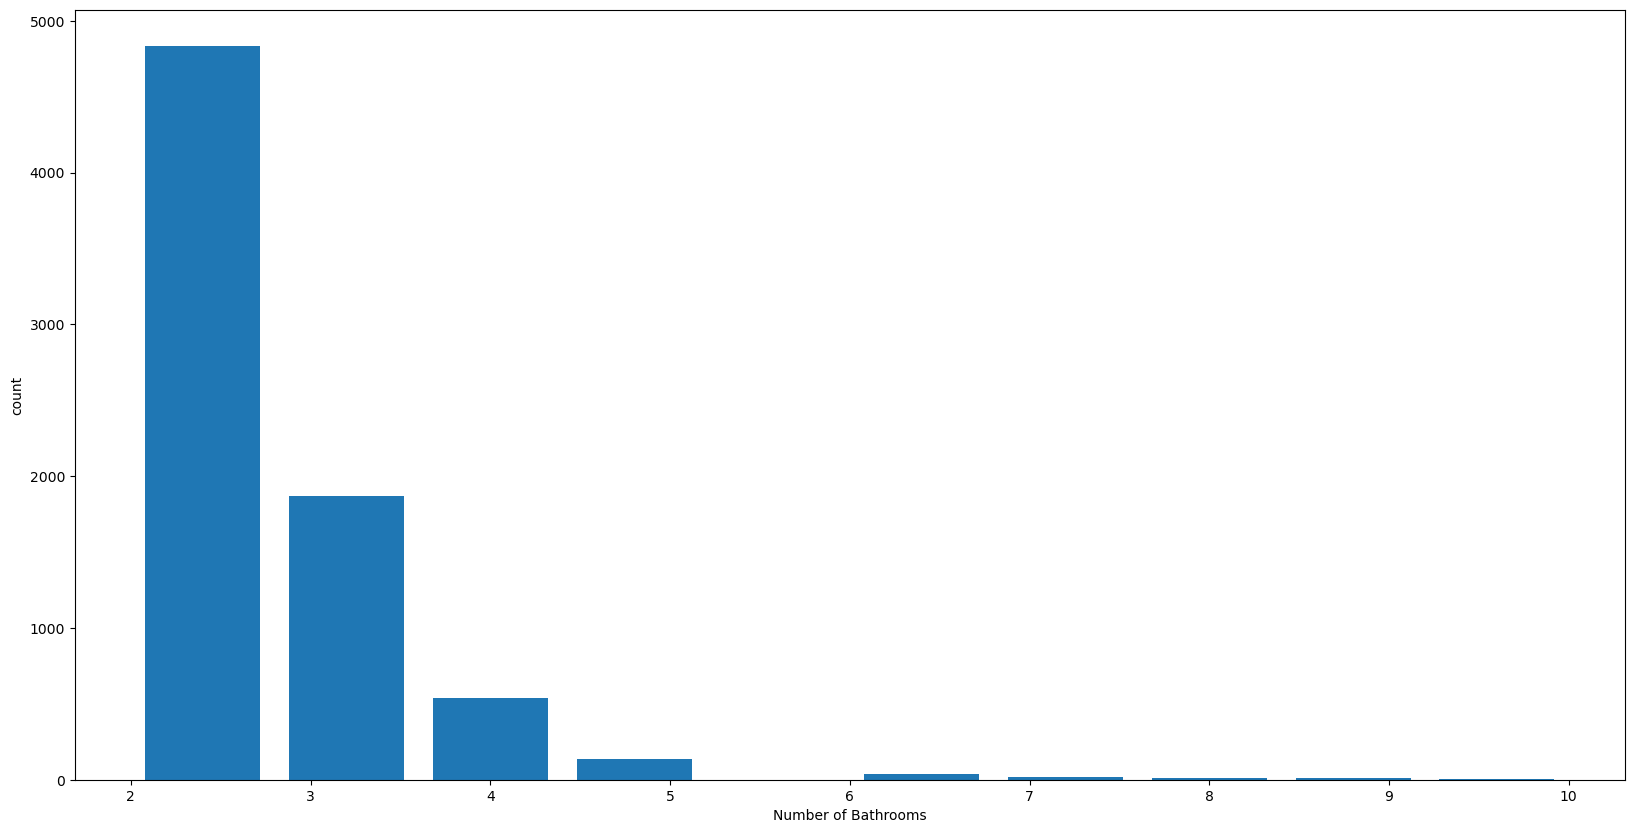

In [26]:
plt.hist(df3.Bathrooms, rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('count')

In [27]:
df3[df3.Bathrooms>df3.Bedrooms+2]

,price,Address,area,Bedrooms,Bathrooms,parking,Lift,Price_sqft
2299,45000000.0,other,5000.0,4.0,7.0,4.0,0.0,9000.000000
2805,6300000.0,other,1500.0,5.0,10.0,0.0,0.0,4200.000000
2853,47500000.0,other,4500.0,5.0,8.0,0.0,0.0,10555.555556
2902,35000000.0,other,5200.0,5.0,9.0,0.0,0.0,6730.769231
3101,14000000.0,other,2370.0,4.0,7.0,0.0,0.0,5907.172996
4599,40000000.0,"Sector 67, Gurgaon, Delhi NCR",6000.0,5.0,8.0,0.0,0.0,6666.666667
7055,18000000.0,other,2400.0,3.0,6.0,3.0,0.0,7500.000000


In [28]:
df4 = df3[df3.Bathrooms<df3.Bedrooms+2]
df4.shape

(7418, 8)

### Drop some unnessesory columns

In [29]:
df5 = df4.drop(['Price_sqft'], axis = 'columns')
df5.head()

,price,Address,area,Bedrooms,Bathrooms,parking,Lift
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,2.0
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,2.0
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,0.0
3,3810000.0,other,1050.0,2.0,2.0,1.0,2.0
4,6200000.0,other,1350.0,2.0,2.0,1.0,3.0


### Get Dummies columns for Address

In [30]:
dummies = pd.get_dummies(df5.Address)
dummies.head()

,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","Dwarka Mor, New Delhi - West, Delhi NCR","Eta 2, Greater Noida, Delhi NCR","Govindpuram, Ghaziabad, Delhi NCR","Greater Noida West, Greater Noida, Delhi NCR","Greater Noida West, Greater Noida, Greater Noida West, Greater Noida, Delhi NCR",...,"Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df6 = pd.concat([df5, dummies.drop('other', axis = 'columns')], axis = 'columns')
df6.head()

,price,Address,area,Bedrooms,Bathrooms,parking,Lift,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR",...,"Siddhartha Vihar, Ghaziabad, Siddhartha Vihar, Ghaziabad, Delhi NCR","Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3810000.0,other,1050.0,2.0,2.0,1.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6200000.0,other,1350.0,2.0,2.0,1.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df7 = df6.drop('Address', axis = 'columns')
df7.head()

,price,area,Bedrooms,Bathrooms,parking,Lift,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR",...,"Siddhartha Vihar, Ghaziabad, Siddhartha Vihar, Ghaziabad, Delhi NCR","Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,5600000.0,1350.0,3.0,3.0,0.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8800000.0,1490.0,3.0,3.0,0.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16500000.0,2385.0,4.0,5.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3810000.0,1050.0,2.0,2.0,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6200000.0,1350.0,2.0,2.0,1.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Built a Model

In [33]:
X = df7.drop('price', axis = 'columns')
X.head()

,area,Bedrooms,Bathrooms,parking,Lift,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR",...,"Siddhartha Vihar, Ghaziabad, Siddhartha Vihar, Ghaziabad, Delhi NCR","Sohna Road, Gurgaon, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,1350.0,3.0,3.0,0.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1490.0,3.0,3.0,0.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2385.0,4.0,5.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1050.0,2.0,2.0,1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1350.0,2.0,2.0,1.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y = df7.price
y.head()

0     5600000.0
1     8800000.0
2    16500000.0
3     3810000.0
4     6200000.0
Name: price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7464413077127638

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.74644131, 0.75242095, 0.73633919, 0.72258583, 0.7405845 ])

### Find best model using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.739674,{'positive': False}
1,lasso,0.739674,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.647501,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [39]:
X.columns

Index(['area', 'Bedrooms', 'Bathrooms', 'parking', 'Lift',
       'Ahinsa Khand 2, Ghaziabad, Delhi NCR', 'Bhopura, Ghaziabad, Delhi NCR',
       'Chi 5, Greater Noida, Delhi NCR',
       'Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR',
       'Crossings Republik, Ghaziabad, Delhi NCR',
       'Dwarka Mor, New Delhi - West, Delhi NCR',
       'Eta 2, Greater Noida, Delhi NCR', 'Govindpuram, Ghaziabad, Delhi NCR',
       'Greater Noida West, Greater Noida, Delhi NCR',
       'Greater Noida West, Greater Noida, Greater Noida West, Greater Noida, Delhi NCR',
       'Gurgaon - Faridabad Road, Gurgaon, Delhi NCR',
       'Gyan Khand 1, Ghaziabad, Delhi NCR',
       'Hari Nagar, New Delhi - West, Delhi NCR',
       'Indirapuram, Ghaziabad, Delhi NCR',
       'Indirapuram, Ghaziabad, Indirapuram, Ghaziabad, Delhi NCR',
       'Kaushambi, Ghaziabad, Delhi NCR', 'Lal Kuan, Ghaziabad, Delhi NCR',
       'Mohan Nagar, Ghaziabad, Delhi NCR', 'NH 24, Ghaziabad, Delhi NCR',

In [40]:
np.where(X.columns == 'Chi 5, Greater Noida, Delhi NCR')[0][0]

7

### Test the model for few properties

In [41]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return model.predict([x])[0]

In [42]:
predict_price('Chi 5, Greater Noida, Delhi NCR', 1000, 2, 2)

2627927.3186405823

In [43]:
predict_price('Chi 5, Greater Noida, Delhi NCR', 1000, 3, 3)

2974901.3634261433

In [44]:
predict_price('Vikaspuri, New Delhi - West, Delhi NCR', 1000, 2, 2)

9060814.17447047

In [45]:
predict_price('Vikaspuri, New Delhi - West, Delhi NCR', 1000, 3, 3)

9407788.219256032